# **Classificação Fumante: Baggins e Random Forest +Variáveis**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisãao**) o fato de ser ou não fumante afeta muito o valor dos custos médicos quando falamos de seguro de saúde, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam estes planos.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necessidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---

# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

#Informações dos dados e Mise en place:

Obter informações dos dados e Mise en place:
Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

Transformar a variável Fumante em 0 (não) ou 1 (sim)
Colocar a variável resposta na escala para cada mil dolares.
Nesta análise também vamos considerar só as variáveis:

var. dependiente: Fumante
var. independientes: índice de massa corporal (IMC), Idade(age) e o **custo**

In [ ]:
# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})

dados = dados[['age', 'bmi', 'sex', 'charges','smoker']]
dados.head()

,age,bmi,sex,charges,smoker
0,19,27.900,0,16.884924,1
1,18,33.770,1,1.725552,0
2,28,33.000,1,4.449462,0
3,33,22.705,1,21.984471,0
4,32,28.880,1,3.866855,0


In [ ]:
# separação de variáveis preditoras e variával resposta
X = dados[['age', 'bmi', 'charges']]
#X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Bagging de Modelos**

Anteriormente tinhamos um conjunto de dados e separavamos para ter subconjuntos, treino e teste. Mas na ideia em Baggins é ter o mesmo modelo com diferentes conjunto de dados. 

O problema é ter varios conjunto de dados, para isto é usada a técnica de extração de amostragem com reposição chamada de **BOOTSTRAP**.

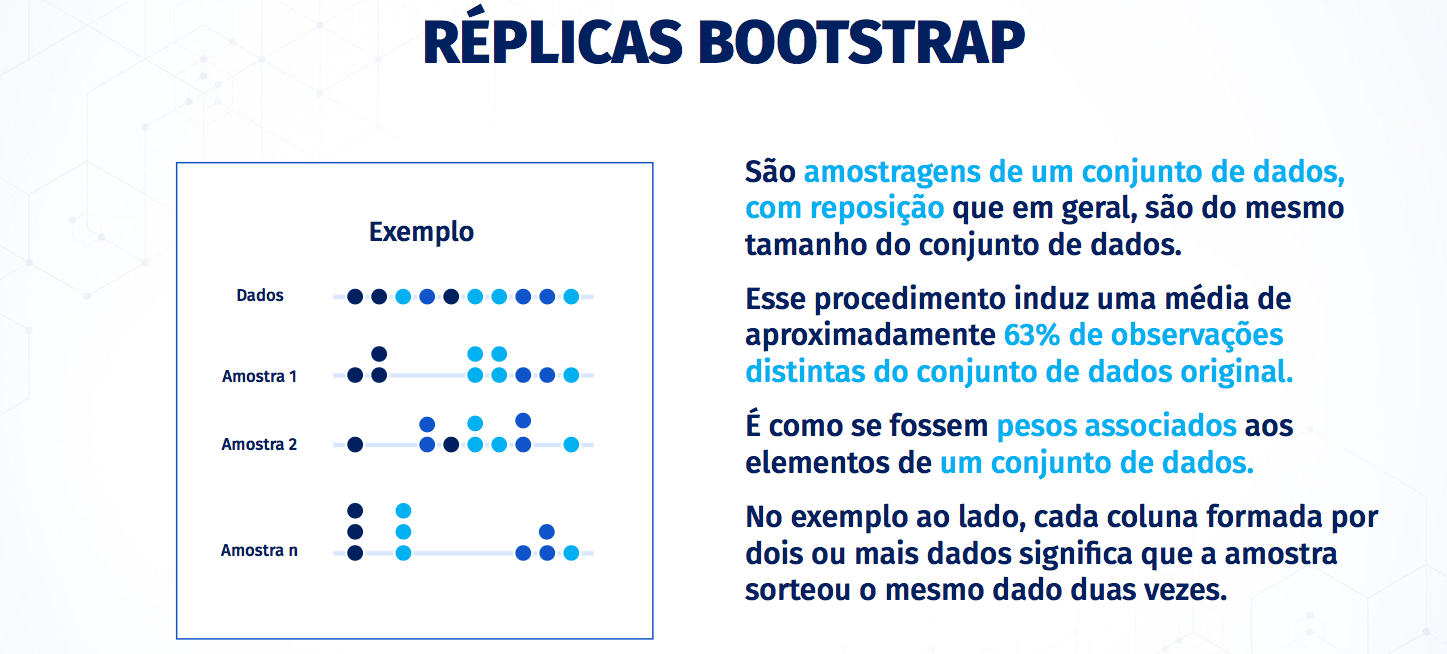

No exemplo temos na:

amostra 1: o elemento 2 foi tirado 2 vezes, as 3 4 e 5 nao foram sorteadas e a 6 e 7 foram tiradas duas vezes.

amostra 2: ...

amostra 3: ...

As repetições indicam que esse elemento terá um peso diferente


---


##**Método de Baggins (Bootstrap Agregation)**

Como tinhamos falado o método de Baggins usa técnica de amostragem com reposição:

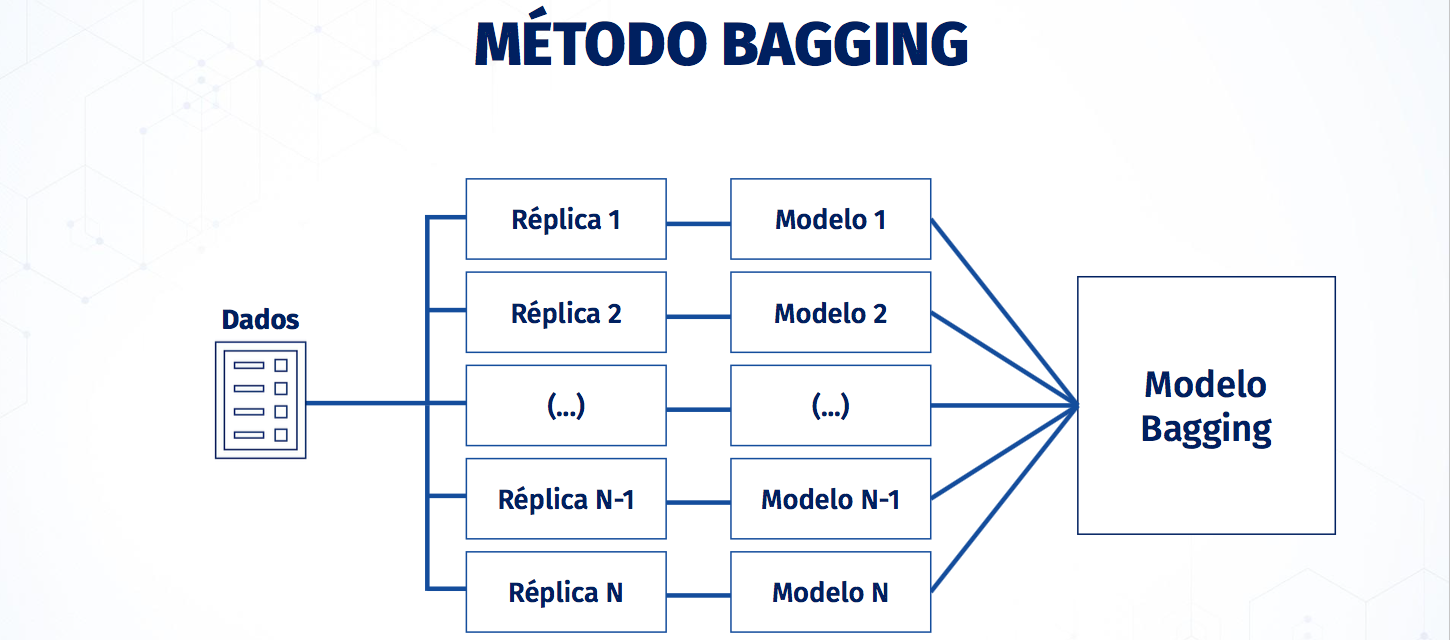

## Upgrade na Técnica de Validação: K-FOLD REPETIDO ESTRATIFICADO
O Método de K-Fold va ser repetido e estratificado. Isto é, sera feito varias vezes e se obtem a média.

Lembrando:

Para a validação chamamos a biblioteca sklearn.model_selection

aplicando as funções:

* RepeatedStratifiedKFold -> define repetições no K-Fold e as repetições mantem sempre a proporção.
* cross_validate -> a função que faz a validação cruzada e calcula a métrica.

nsplits: definição das partesno K-Fold

nrepeats_ : define quantas vezes será repetido o K-Fold

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

---

O Método:

Para fazer usso do Baggins temos que chamar a biblioteca _sklearn.ensemble_. (emsamble-> combinação de modelos)

onde será chamada a função:

* _BaggingClassifier_ -> define a função de baggins que chamará a função _BagginsClassifier_ 

n_estimators: número de replicas (número de modelos a criar)

modelo_base: escolher o modelo que servirá como base

Importante: Não é bom usar a **Regressão Logística** como modelo base.

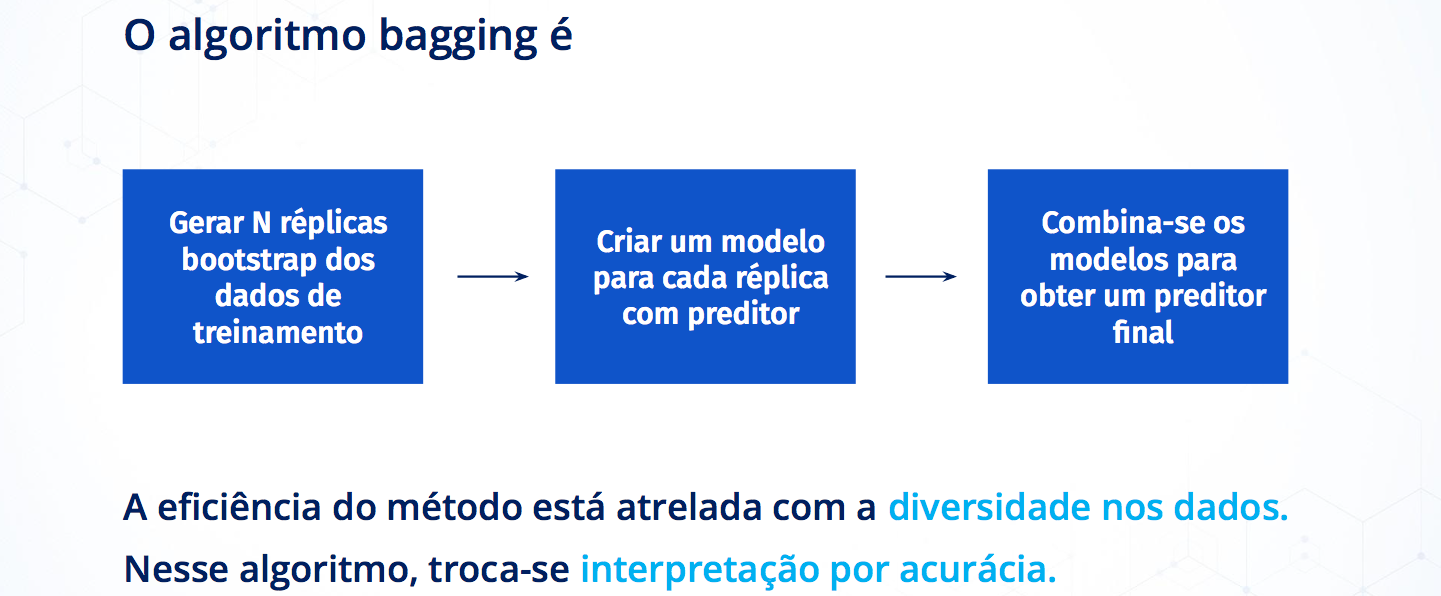

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#modelo_base = LogisticRegression()
modelo_base = DecisionTreeClassifier(max_depth = 3) 
modelo = BaggingClassifier(n_estimators = 50)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9709

---
---


## **Random Forest**

Também é uma combinação de modelos. Inicia como Baggins mas depois faz um procedimento adicional para adicionar aleatoriedade, para adicionar diversidade.

Usa como modelo base o modelo de **Árvore de Decisão**






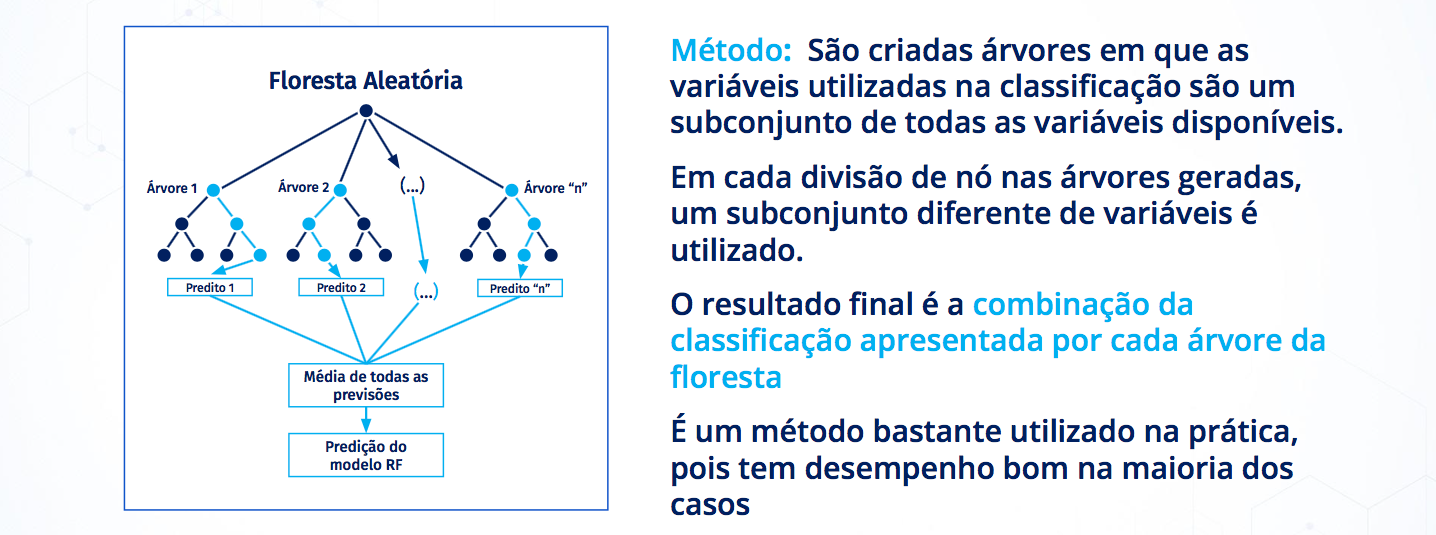



Para fazer usso do Baggins temos que chamar a biblioteca _sklearn.ensemble_. (emsamble-> combinação de modelos)

onde será chamada a função:

* _RandomForestClassifier_ -> define a função de Random Forest que chamará a função _RandomForestClassifier_ 

n_estimators: número de árvores (número de árvores a criar)

max_Feature: número de variáveis ou de colunas que sera permitido para fazer cada procedimento (normalmente é a raiz quadrada do valor de colunas).

bootstrap: aplica ou não o procedimento de bootstrep

max_depth: profundidade

min_samples_split: número mínimo para fazar a seleção


In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 200, 
                                max_features = 'auto',
                                bootstrap = True,
                                max_depth = 7, 
                                min_samples_split = 50)

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9579

---
## **Importância de Variáveis**

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado **feature importance**. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível conhecer melhor a interpretação que o modelo está fazendo dos dados e também permitir fazer uma seleção das variáveis mais importantes para utilizar em um modelo final. 


Importante: A validação é para escolher o modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

modelo_base = RandomForestClassifier(max_depth = 3) 
modelo_base.fit(X, y) 

modelo_base.feature_importances_

array([0.05979189, 0.0753785 , 0.86482961])

In [ ]:
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = modelo_base.feature_importances_
variaveis

,variavel,importância
0,age,0.059792
1,bmi,0.075379
2,charges,0.864830


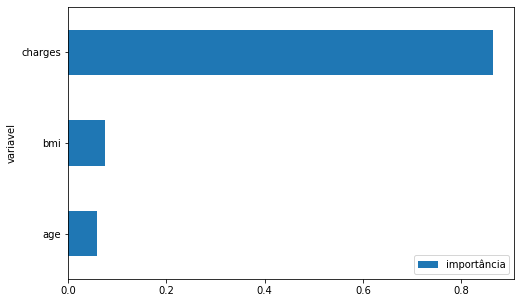

In [ ]:
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

##Conclusão

Tanto o modelo de Baggins posue uma boa performance refletida na melhora na acurácia = 0.97 já o **Random Forest** perdeu acurácia =0.95 

É importante ressaltar que no procedimento de Random Forest é possível visualizar a importância de cada variável no ajuste (parâmetro adicional), o que indica que a variável **Custo** tem um peso muito maior e que as variáveis **IMC** e **Idade** tem um peso quase igual na hora de saber se é fumante o não.

Será feita a adição de uma variável (**Idade**) para verificar se melhora o resultado.